<a href="https://colab.research.google.com/github/tskmr/BS/blob/main/Lec7_pres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07-Data joining and maps

## Getting started: drawing a map of the USA

Let’s start by drawing a map of the USA. The maps package contains a lot of outlines of continents, countries, states, and counties. ggplot2’s map_data function puts these outlines in data frame format, which then allows us to plot them with ggplot.
アメリカの地図を描くことから始めよう。ggplot2のmap_data関数は、これらのアウトラインをデータ・フレーム形式にし、ggplotでプロットできるようにする。

Let’s load the packages that we need:
必要なパッケージをロードしよう：



In [1]:
library(tidyverse)
if(!require(maps)) install.packages("maps")
library(maps)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: maps

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘maps’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




Type in the following code:
次のコードを入力する：

In [2]:
map_USA <- map_data("usa")
head(map_USA)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-101.4078,29.74224,1,1,main,NA
2,-101.3906,29.74224,1,2,main,NA
3,-101.3620,29.65056,1,3,main,NA
4,-101.3505,29.63911,1,4,main,NA
5,-101.3219,29.63338,1,5,main,NA
6,-101.3047,29.64484,1,6,main,NA


(If the code above doesn’t work, it could be that the maps package has not been installed yet. Install the maps package and try the code above again.) Each row in the map_USA dataset is one point on the outline of the USA. We are going to use ggplot2’s geom_polygon to connect these points.
(上記のコードが動作しない場合、mapsパッケージがまだインストールされていない可能性があります。mapsパッケージをインストールして、上のコードをもう一度試してください)。map_USAデータセットの各行は、アメリカの輪郭上の1点です。これらの点を結ぶためにggplot2のgeom_polygonを使おうとしています。

It terms out that you can’t draw a map of the US with just one polygon: there are islands (e.g. Long Island) which form separate polygons. To draw just the “main” mainland, filter as follows:
アメリカの地図は1つの多角形だけでは描けないことがわかりました：島（例えばロングアイランド）があり、それらは別々の多角形を形成しています。本島の "main"だけを描くには、次のようにフィルターをかけます：



In [3]:
map_USA_main <- map_USA %>% filter(region == "main")

In the same code chunk, type the following code:
同じコードチャンクに、以下のコードを入力します：

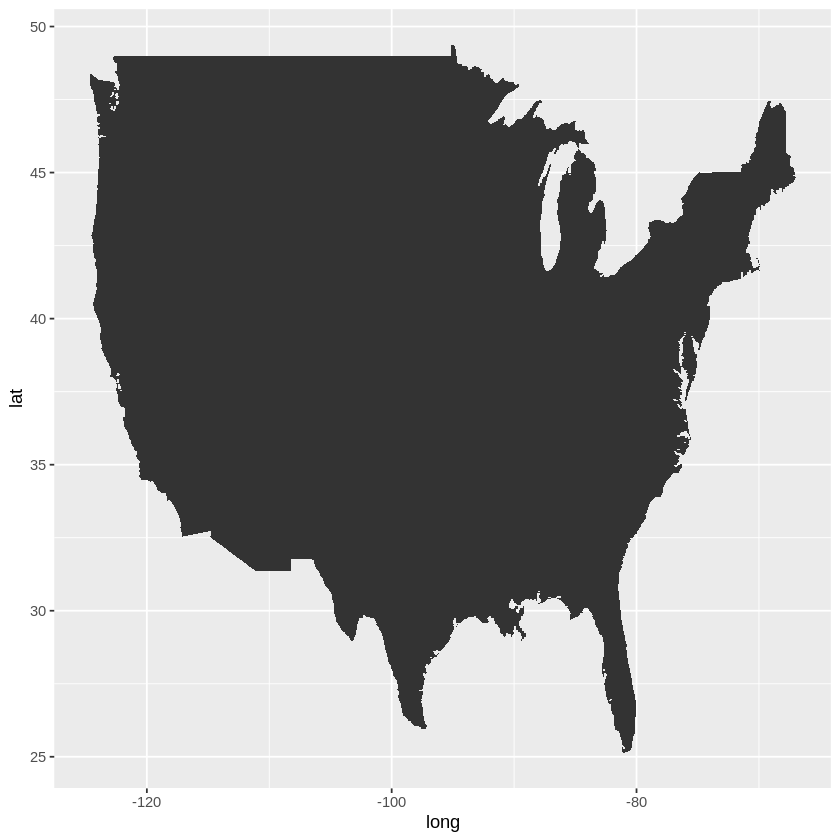

In [4]:
ggplot() +
    geom_polygon(data = map_USA_main, mapping = aes(x = long, y = lat))

We get a map! By default, the fill of the polygon is black. Click on the “Zoom” button and resize the window. Do you notice what happens to the map?
地図ができます！デフォルトでは、ポリゴンの塗りつぶしは黒です。ズーム」ボタンをクリックし、ウィンドウのサイズを変更してください。地図がどうなるかわかりますか？

In order to keep the correct aspect ratio, amend the code for the map by adding on an extra line:
正しい縦横比を保つために、マップのコードを1行追加して修正してください：



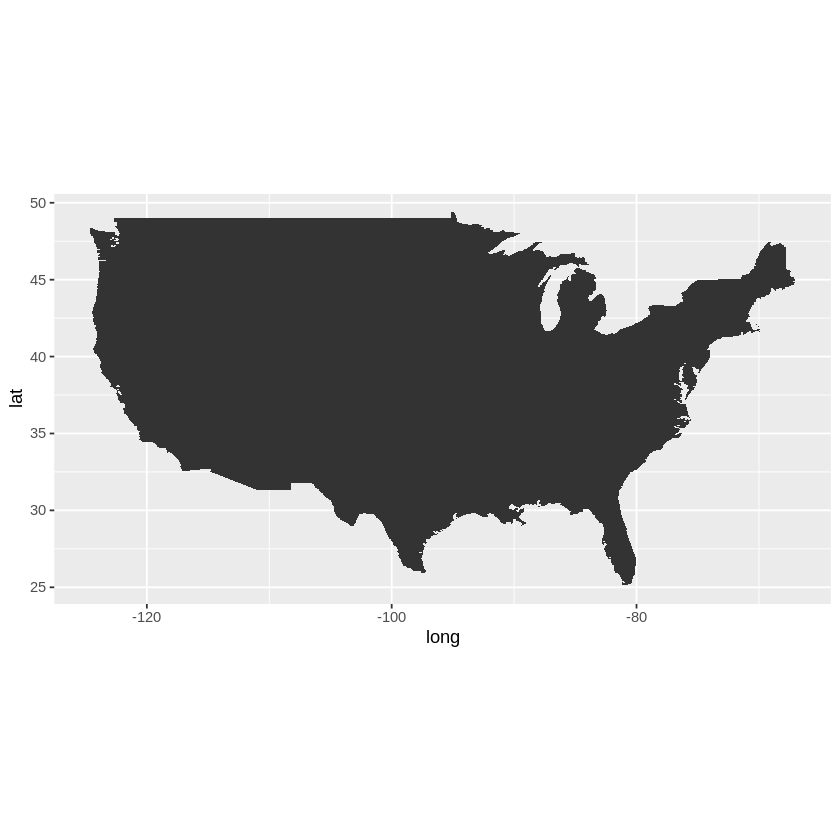

In [5]:
ggplot() +
    geom_polygon(data = map_USA_main, mapping = aes(x = long, y = lat)) +
    coord_quickmap()

Try resizing the window and see the difference in behavior from before.
ウィンドウのサイズを変更してみて、以前との動作の違いを確認してください。

## County map 郡レベルの地図
Let’s try to draw a county-level map. For the later part of this lab, we want to label these counties by FIPS codes (you can read more about FIPS county codes here). It turns out that it’s not so easy to get mapping data with FIPS codes, so I’ve put together a dataset to save you this trouble. Load it with the following code:
郡レベルの地図を描いてみよう。このラボの後半では、FIPSコード（FIPS郡コードについてはこちらを参照）で郡にラベルを付けたい。FIPSコードで地図データを入手するのはそう簡単ではないことがわかったので、この手間を省くためにデータセットをまとめてみた。以下のコードで読み込んでください：

In [7]:
map_county_fips <- readRDS("county_map_fips.rds")
head(map_county_fips)

,long,lat,group,order,region,subregion,fips
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,-86.50517,32.34920,1,1,alabama,autauga,1001
2,-86.53382,32.35493,1,2,alabama,autauga,1001
3,-86.54527,32.36639,1,3,alabama,autauga,1001
4,-86.55673,32.37785,1,4,alabama,autauga,1001
5,-86.57966,32.38357,1,5,alabama,autauga,1001
6,-86.59111,32.37785,1,6,alabama,autauga,1001


Let’s draw a county map using code that’s very similar to what we had for drawing the map of the USA:
アメリカの地図を描いたときとよく似たコードを使って、郡の地図を描いてみよう：

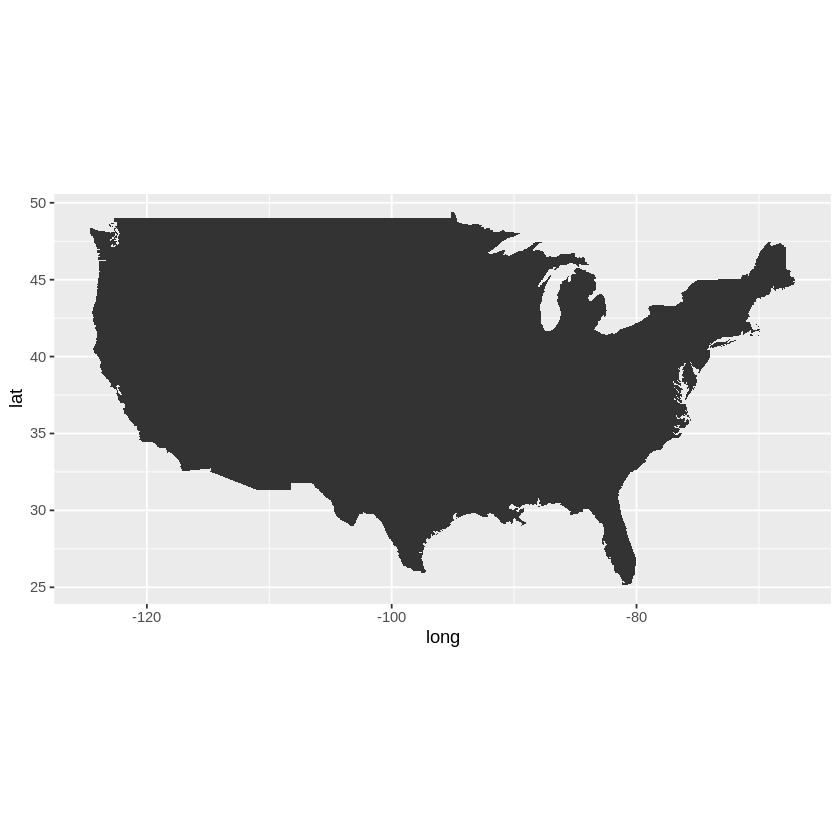

In [8]:
ggplot() +
    geom_polygon(data = map_county_fips,
                 mapping = aes(x = long, y = lat, group = group)) +
    coord_quickmap()



Now, let’s draw a map with black outlines for the counties, and different colors for each state:
では、県を黒い輪郭で囲み、州ごとに色を変えた地図を描いてみよう：

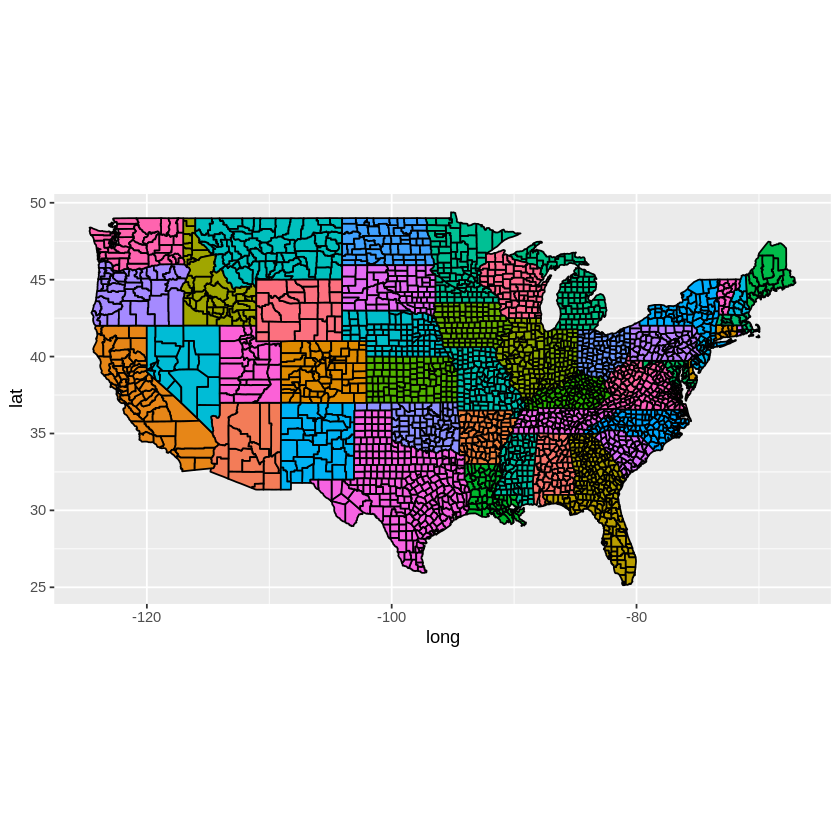

In [9]:
ggplot() +
    geom_polygon(data = map_county_fips,
                 mapping = aes(x = long, y = lat, group = group, fill = region),
                 col = "black") +
    coord_quickmap() +
    theme(legend.position="none")




## Exercises
What precisely does coord_quickmap() do? Find some other map coord_ commands and experimant with them.
What happens when you don’t include the group argument in geom_polygon()? Test is out on the data frame map_USA.
Generate a map of only the counties of California.
Find all the quadrilateral counties in the US and map them. Which state has the highest proportion of such counties?
Elections data
The goal of the rest of this lab is to visualize the 2016 US presidential elections results on a county-level map. Let’s load the elections data and have a peek at it:
coord_quickmap()は具体的に何をするのか？他のマップの coord_ コマンドをいくつか見つけて実験してみてください。geom_polygon()にgroup引数を含めないとどうなるか？データフレーム map_USA でテスト。カリフォルニア州の郡だけの地図を作成します。アメリカのすべての四角形の郡を見つけ、それを地図にします。このような郡の割合が最も高いのはどの州か？選挙データ このラボの残りの目標は、2016年のアメリカ大統領選挙の結果を郡レベルの地図上に可視化することです。選挙データをロードして、それを覗いてみよう：

In [13]:
df <- read_csv("2016_US_Presdential_Results_for_class.csv")
head(df)

Rows: 3141 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): state, county
dbl (5): fips, percent_diff, votes_dem, votes_gop, total_votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fips,percent_diff,state,county,votes_dem,votes_gop,total_votes
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013,15.17105,AK,Alaska,93003,130413,246588
2016,15.17105,AK,Alaska,93003,130413,246588
2020,15.17105,AK,Alaska,93003,130413,246588
2050,15.17105,AK,Alaska,93003,130413,246588
2060,15.17105,AK,Alaska,93003,130413,246588
2068,15.17105,AK,Alaska,93003,130413,246588


In order to have the fills of the counties depend on our elections data, we need to somehow get information from our df dataset to the map_county_fips dataset. We can achieve this by using dplyr’s left-join.
郡の塗りつぶしを選挙データに依存させるためには、dfデータセットからmap_county_fipsデータセットに情報を取得する必要がある。これを実現するには、dplyrのleft-joinを使います。

The code below joins the two data frames on the fips column (map_county_fips is on the left, df is on the right):
以下のコードは、2つのデータフレームをfips列で結合しています（左側がmap_county_fips、右側がdfです）：



In [14]:
# join elections data to mapping data
map_county_per_diff <- map_county_fips %>%
    left_join(df, by = "fips")

Next, we use ggplot to plot the data:
次に、ggplotを使ってデータをプロットする：

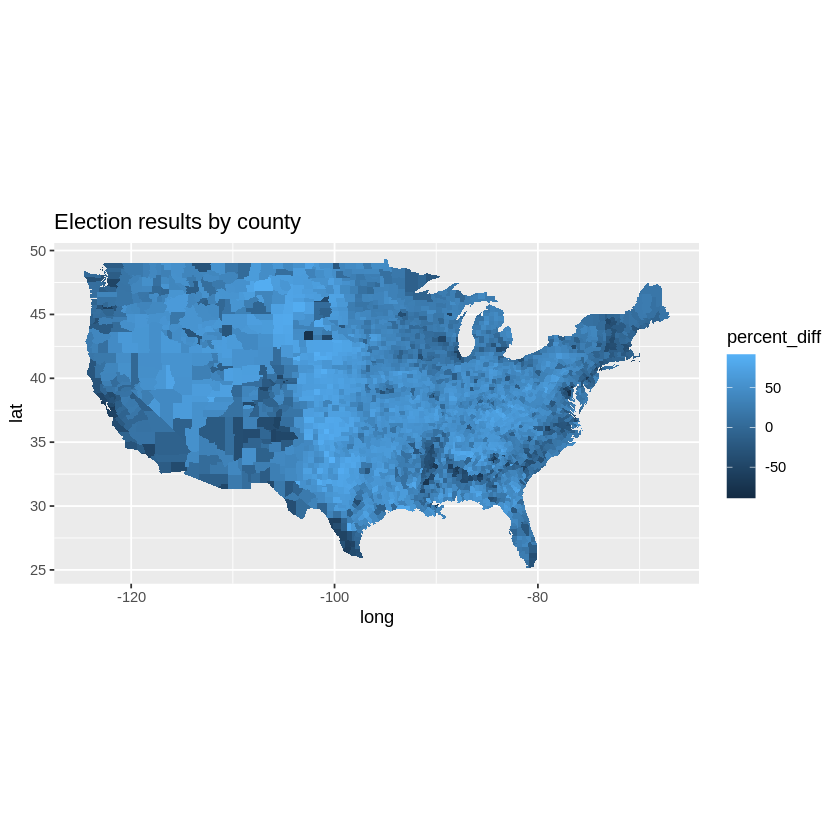

In [15]:
ggplot(data = map_county_per_diff, mapping = aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = percent_diff)) +
    coord_quickmap() +
    labs(title = "Election results by county")

Great, we got a map! There are two things we can do to improve on it:
地図ができた！改善点は2つある：

The color scale is currently different shades of blue. Something more informative would be counties that voted very Republican being red, those that voted very Democrat being blue, and those that voted evenly being white.
The “lat” and “long” axes, as well as the grey background with grid lines, are not helpful for interpreting maps.
Let’s change the color scale first. Amend the map plotting code to the following (see ?scale_fill_gradient2 to understand how it works):
現在のところ、色の濃淡が異なっている。共和党に多く投票した郡は赤、民主党に多く投票した郡は青、そして均等に投票した郡は白とすれば、より有益な情報が得られるだろう。
緯度」軸と「経度」軸、そして格子線の入った灰色の背景は、地図を解釈するのに役立っていない。
まずカラースケールを変えてみよう。地図をプロットするコードを次のように修正する（?scale_fill_gradient2を見て仕組みを理解しよう）：




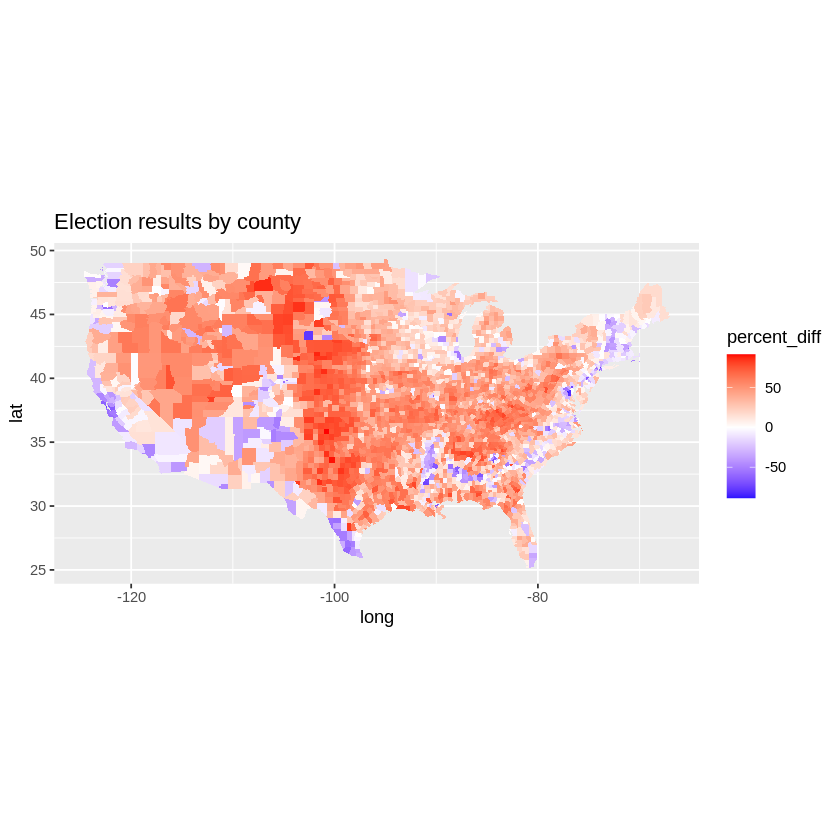

In [16]:
ggplot(data = map_county_per_diff, mapping = aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = percent_diff)) +
    scale_fill_gradient2(low = "blue", high = "red") +
    coord_quickmap() +
    labs(title = "Election results by county")

To remove parts of the plot which are not helpful, type in the following code in the same chunk before the ggplot call:
プロットの役に立たない部分を削除するには、ggplot呼び出しの前の同じチャンクに次のコードをタイプする：


In [17]:
map_theme <- theme(
    axis.title.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.ticks.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text.y  = element_blank(),
    axis.ticks.y = element_blank(),
    panel.background = element_rect(fill = "white")
)

Next, add map_theme to the ggplot function call:
次に、ggplot関数呼び出しにmap_themeを追加する：

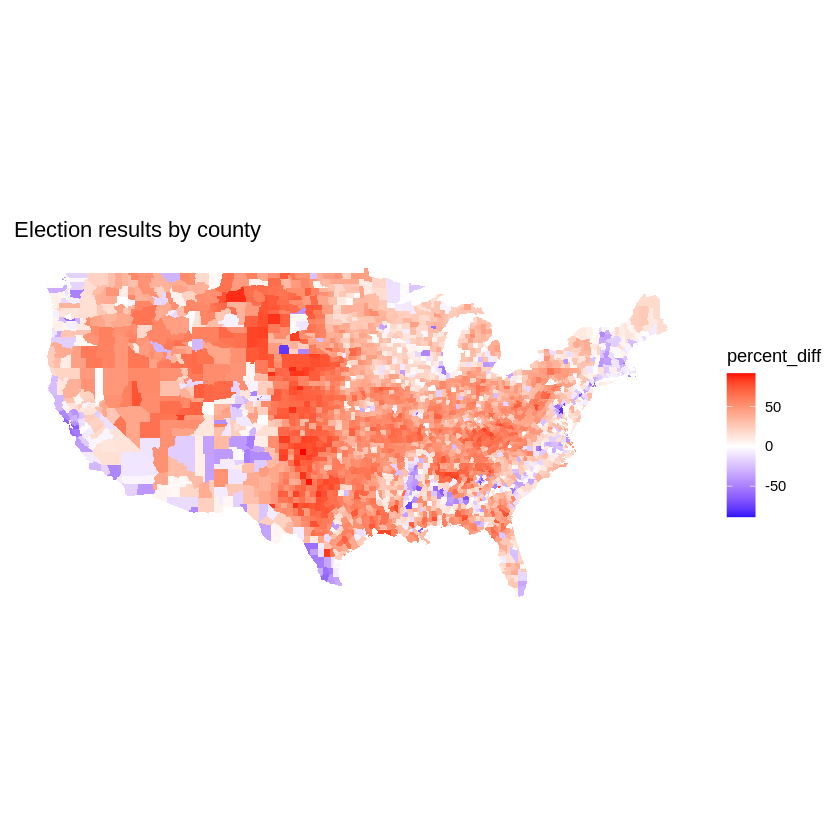

In [18]:
ggplot(data = map_county_per_diff, mapping = aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = percent_diff)) +
    scale_fill_gradient2(low = "blue", high = "red") +
    coord_quickmap() +
    labs(title = "Election results by county") +
    map_theme


Play around with the labels, theme and color scales. Do any of the counties stand out to you? How can we modify the code above to draw a map of just one state?
ラベル、テーマ、カラースケールで遊んでみてください。目立つ県はありますか？上のコードをどのように修正すれば、1つの州だけの地図が描けるだろうか？

We can see that large parts of the country voted more Republican than Democratic. At the same time, it doesn’t look like 85% of the map is red. This suggests that Trump won many counties which are geographically small.
国の大部分が民主党よりも共和党に投票したことがわかる。同時に、地図の85％が赤であるようには見えない。これは、トランプが地理的に小さい多くの郡を獲得したことを示唆している。


#### Exercises
Highlight on the map the 20 counties whose results were closest to a tie.
Using group_by() and summarize(), create a map of the state-by-state vote totals (this is demonstrated in the next section, but you should try to do it yourself before moving on).
Suppose that we are interested in mapping the change in vote share between 2016 and 2020. Think about how you might do this, and try to implement it.
結果が同点に最も近かった 20 の郡を地図上で強調表示する。group_by()とsummarize()を使って、州ごとの得票合計のマップを作成する（これは次のセクションで実演するが、先に進む前に自分でやってみるべきである）。2016年と2020年の投票率の変化をマッピングすることに興味があるとします。これをどのように行うかを考え、実行してみよう。

#### Optional material
##### County map with state boundaries
To make the map better, we could draw state boundaries as well. Create a new code chunk and type in the following code. (Compare this code with the code in the previous chunk and try to figure out how the state boundaries were drawn.)
#### 州境のある郡の地図
地図をより良くするために、州の境界線も描いてみよう。新しいコードチャンクを作り、次のコードを入力する。(このコードと前のチャンクのコードを見比べて、州の境界線がどのように描かれたかを考えてみよう)。



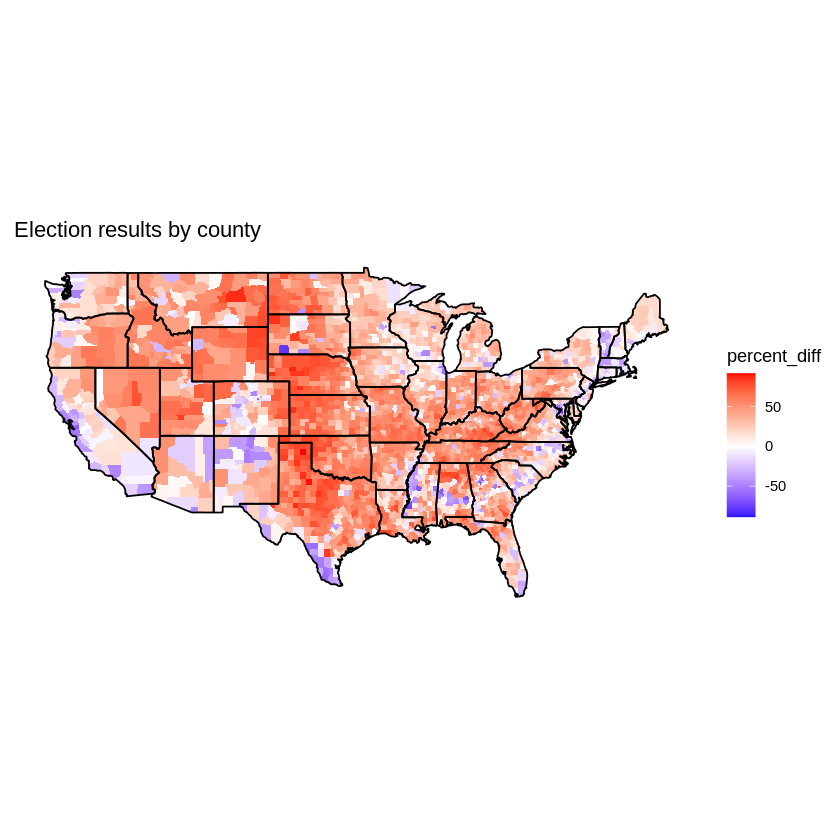

In [19]:
map_state <- map_data("state")
ggplot(data = map_county_per_diff, mapping = aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = percent_diff)) +
    geom_polygon(data = map_state, fill = NA, color = "black") +
    scale_fill_gradient2(low = "blue", high = "red") +
    coord_quickmap() +
    labs(title = "Election results by county") +
    map_theme

(If you’re curious, that very blue spot in the middle of the country is Oglala County, South Dakota. From Wikipedia: “The counties surrounding Oglala Lakota County are predominantly Republican, but, like most Native American counties, Oglala Lakota is heavily Democratic, giving over 75 percent of the vote to every Democratic presidential nominee in every election back to 1984, making it one of the most Democratic counties in the United States. No Republican has carried the county in a presidential election since 1952.”)
(もし興味があるなら、この国の真ん中にある真っ青な場所はサウスダコタ州オグララ郡である。ウィキペディアより： 「オグララ・ラコタ郡周辺の郡は共和党が多いが、他のネイティブ・アメリカンの郡と同様、オグララ・ラコタ郡は民主党が多く、1984年までのすべての選挙で民主党の大統領候補に75％以上の票を投じ、全米で最も民主党が多い郡のひとつとなっている。1952年以降、大統領選挙で共和党がこの郡を支持したことはない」）。


#### State-level map
Let’s try to make the same map but at the state level, instead of at the county level. Make a new dataframe containing state-level data:
#### 州レベルの地図
同じ地図を、郡レベルではなく州レベルで作ってみよう。州レベルのデータを含む新しいデータフレームを作成します：


In [20]:
state_df <- df %>% group_by(state) %>%
    summarize(votes_dem = sum(votes_dem),
              votes_gop = sum(votes_gop),
              total_votes = sum(total_votes)) %>%
    mutate(diff = votes_gop - votes_dem,
           percent_diff = diff / total_votes)


Notice that state_df and map_state contain their data on state differently: it’s abbreviated in state_df, while its the full name in map_state. We’ll need to do some data wrangling/transformation to get them to match.
state_dfとmap_stateでは、州に関するデータが異なっていることに注目してほしい：state_dfでは省略されているが、map_stateではフルネームである。両者を一致させるには、データの整理／変換が必要だ。

R has 2 built-in variables, state.abb and state.name, which can help us. First, let’s augment these variables with “District of Columbia”:
Rにはstate.abbとstate.nameという2つの組み込み変数がある。まず、これらの変数を "District of Columbia "で補強してみよう：




In [21]:
state_abb <- c(state.abb, "DC")
state_name <- c(state.name, "District of Columbia")

Next, we use the following line of code to add a new column to state_df which has the state name in full. (See ?match to figure out what is going on here. We also have to use tolower() as the state names are all in small letters in the map_state dataset.)
次に、state_dfに新しいカラムを追加する。(ここで何が起こっているかは?matchを参照されたい。また、map_stateデータセットでは州名がすべて小さな文字なので、tolower()を使う必要がある)。

In [22]:
state_df$region <- tolower(state_name[match(state_df$state, state_abb)])

We are now in a position to join the datasets:
私たちは今、データセットを結合する立場にある：

In [23]:
combined_state_df <- map_state %>% left_join(state_df, by = "region")

The commands for plotting are almost the same as for the county map:
プロットのためのコマンドは、郡マップの場合とほとんど同じである：

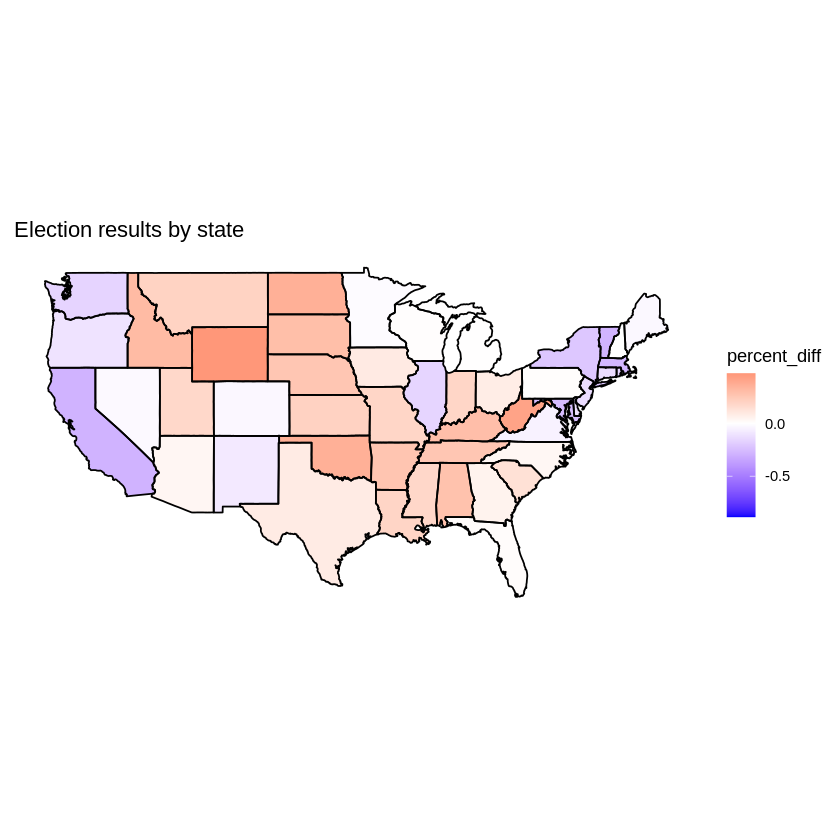

In [24]:
ggplot(data = combined_state_df, mapping = aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = percent_diff)) +
    geom_polygon(fill = NA, color = "black") +
    scale_fill_gradient2(low = "blue", high = "red") +
    coord_quickmap() +
    labs(title = "Election results by state") +
    map_theme


We can also plot the state labels on the map (notice that the group can no longer be in the ggplot() call):
また、マップ上に状態ラベルをプロットすることもできる（ggplot()呼び出しの中にグループがもはやないことに注意）：

In [25]:
state_names <- combined_state_df %>% group_by(state) %>%
    summarize(lat = 0.5 * (max(lat) + min(lat)),
              long = 0.5 * (max(long) + min(long)))

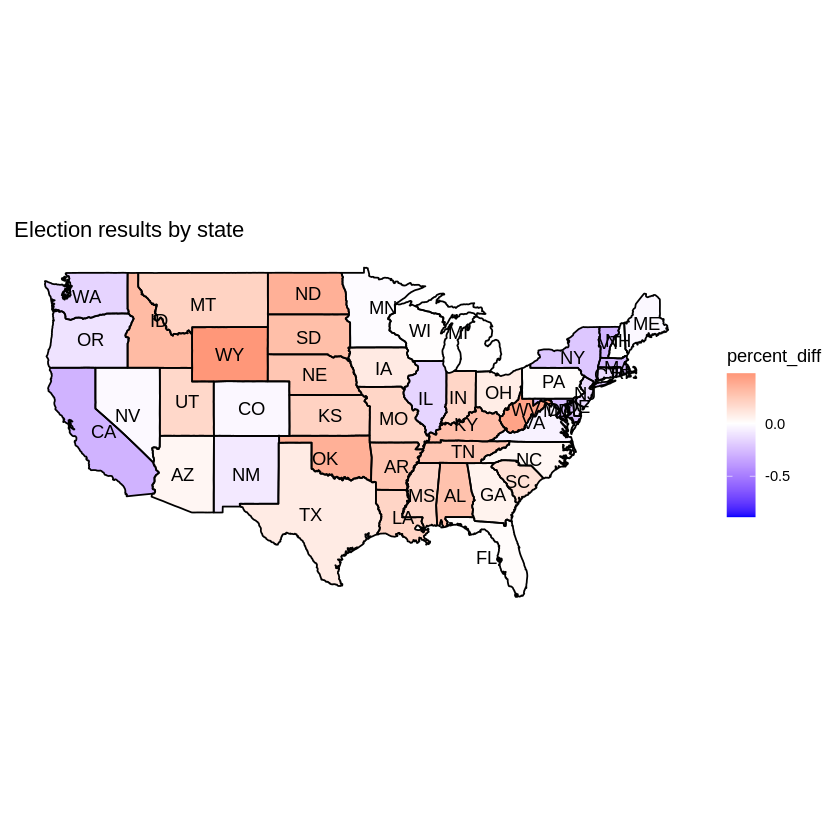

In [26]:
ggplot(data = combined_state_df, mapping = aes(x = long, y = lat)) +
    geom_polygon(aes(group = group, fill = percent_diff)) +
    geom_polygon(aes(group = group), fill = NA, color = "black") +
    geom_text(data = state_names,
              mapping = aes(x = long, y = lat, label = state)) +
    scale_fill_gradient2(low = "blue", high = "red") +
    coord_quickmap() +
    labs(title = "Election results by state") +
    map_theme